---

**<font color="green">Reviewer's comment V3</font>**

Hi, Raymond!

You've worked hard and now your project is perfect!


---


---

**<font color="green">Reviewer's comment V2</font>**

Raymond, hello!

I really appreciate the corrections you sent in! Thanks for taking the time to do so.


---


---

**<font color="green">Reviewer's comment</font>**

Hi, Raymond! You've done a really good job!

My name is Yuliy Afanasoglu, I'll review your project.

In the notebook you'll meet my comments in markdown cells with "Reviewer's comment" title.

Please don't delete my comments. Great if you choose **<font color="blue">visible color</font>**  or **text format** - It's easier for us to follow the corrections.

---

My comments look like:

<div class="alert alert-block alert-danger">
    

### Reviewer's comment

This comment is required corrections - I can't accept project without it
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Reviewer's comment

This comment correction is up to you - It is recommendation or advice for future
    
</div>

---

<div class="alert alert-block alert-success">
    

### Reviewer's comment

This comment indicates right and quality decision =)

</div>

---


# Data Preprocessing

---


<div class="alert alert-block alert-danger">
    

### Reviewer's comment
    
Oops! Something went wrong — let's take a look! I can't start to review your project. Your code doesn't run. Please fix it. 
    
I recommend to use the `Kernel -> Restart & Run All` command before sending for review.
    
I looked through your project and found some points to make better your research:
- define research title, description, scope, tasks and main goal at the beginning
- highlight preprocessing section with main steps (missing values, data types, duplicates, and don’t forget conclusions)
- add plot title and axis names to every graph
- define null / alternative hypothesis to each hypothesis test
- define conclusions at the end of each report chapter 
- don't forget that general conclusion at the end of the research contains information about all steps you've done
- report customer wants to find business context at your general conclusion (not only declaration about statistical test results)


    
I believe you can easily fix it :)

</div>

---


---


<div class="alert alert-block alert-danger">
    

### Reviewer's comment V2
    
This needs your attention:

Please try to work with all red comments - it's very important. If they are not corrected - I can't accept your project.
    
Don't forget this point: `define research title, description, scope, tasks and main goal at the beginning`

</div>

---


>don't forget that general conclusion at the end of the research contains information about all steps you've done

***I'm not too sure what you mean by this part. Where should I be adding additional conclusions?***

---


<div class="alert alert-block alert-danger">
    

### Reviewer's comment V2
    
I mean: all steps of your research should be reflected at general conclusion chapter: preprocessing, RICE / ICE Prioritizing, cumulative metrics research, etc - not only AB test results 
    
General conclusions chapter is the mirror of your research - usually business customers read it first of all. 

</div>

---


# Analysis of Hypothesis Results on Revenue 

Together with the marketing department, a list of hypotheses ha been compiled that may help boost revenue.

The hypotheses will need to be prioritzed, the results of the A/B test need to be analyzed with sufficient graphs to visualize the data and then analyze the statistical significance to see if there is a difference between the two groups.

The main goal of this project is to determine if the hypotheses improve revenue between the two groups and then to consider adopting the changes.

---


<div class="alert alert-block alert-success">
    

### Reviewer's comment V3
    
Great improvement! 

</div>

---


In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

orders = pd.read_csv('/datasets/orders_us.csv',
                    parse_dates=['date'])

visits = pd.read_csv('/datasets/visits_us.csv',
                     parse_dates=['date'])

***Loaded the csv files with the correct data types***

In [3]:
#Open hypothesis and analyze what's inside
print(hypothesis.info())
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
#Open orders and examine the contents
print(orders.info())
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [5]:
#Examine orders to see if there's any abnormal users
both_group = orders.groupby('visitorId').agg({'group':'count'}).reset_index()
print(both_group[both_group['group']>5])

#Examine the users who had many group switches
print(orders[orders['visitorId']==2038680547].sort_values(by='date'))
print()
print(orders[orders['visitorId']==2378935119].sort_values(by='date'))
print()
print(orders[orders['visitorId']==2458001652].sort_values(by='date'))
print()
print(orders[orders['visitorId']==4256040402].sort_values(by='date'))


#Remove users who had many group switches
filtered_orders = orders.query(
    'visitorId!="2038680547" & visitorId!="2378935119" & visitorId!="2458001652" & visitorId!="4256040402"')

       visitorId  group
487   2038680547      8
569   2378935119      9
591   2458001652     11
1023  4256040402     11
     transactionId   visitorId       date  revenue group
577     3932236947  2038680547 2019-08-04     45.1     B
578     1570911533  2038680547 2019-08-04     25.5     A
605     1215730747  2038680547 2019-08-04     40.1     A
32      3666913472  2038680547 2019-08-15     30.8     B
227     4267573899  2038680547 2019-08-17     55.4     A
117      722060263  2038680547 2019-08-22     15.7     A
390     2415738512  2038680547 2019-08-25      5.2     A
624     1666104258  2038680547 2019-08-29     40.2     B

      transactionId   visitorId       date  revenue group
697      1612868255  2378935119 2019-08-09    475.5     B
1029      469609643  2378935119 2019-08-10    900.7     A
1031     1661772358  2378935119 2019-08-10     45.6     B
33        486237576  2378935119 2019-08-15     30.4     A
179      1784270968  2378935119 2019-08-17      5.8     A
118      423353390

In [6]:
#Open visits and examine the contents
print(visits.info())
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


***Data Preprocessing Conclusion***

Decided to check for users who switched too often between A and B groups and then removed them since it would negatively affect the results of the A/B test. Overall the data appears to be ready for analysis.

---


<div class="alert alert-block alert-success">
    

### Reviewer's comment V2
    
It's a great idea to explore abnormal users
    
Don't forget about duplicates

</div>

---


# Part 1. Prioritizing Hypotheses

### Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [7]:
#Calculate the ICE amount
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Effort']
hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


***The hypothesis to launch a promotion has the greatest result while changing the background color of the main page won't affect the results much.***

### Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [8]:
#Calculate the RICE amount
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Effort']
hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


***Adding a subscription page to all main pages will have the most effect with the RICE framework while changing the background color of the main page still has little to no effect.***

### Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

Examining the results of ICE and RICE shows that what has the most results vary if the 'reach' variable is considered.

If the 'reach' variable isn't considered, then the hypothesis of launching a new promotion will have the most impact, but if 'reach' is considered, then adding a new subscription form will have the most results. 

Though the hypotheses require the same amount of effort, the variable 'reach' can cause a significant change in how the results of the hypotheses will play out. 

---


<div class="alert alert-block alert-success">
    

### Reviewer's comment V2
    
Correct conclusion and correct explanation of ICE / RICE framework  prioritization winner 

</div>

---


# Part 2. A/B Test Analysis

### Graph cumulative revenue by group. Make conclusions and conjectures.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


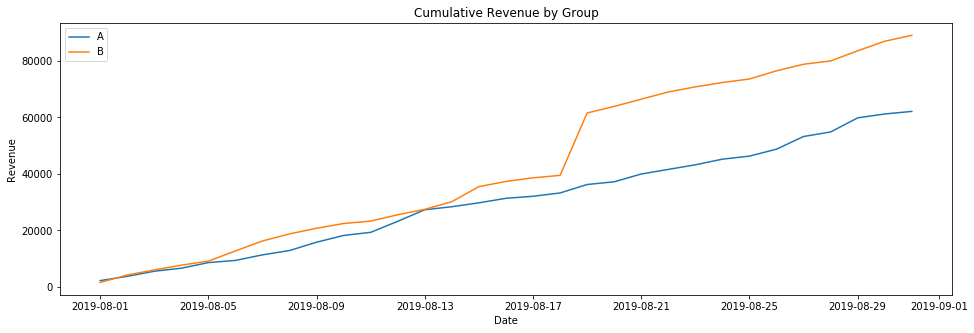

In [9]:
#Create date groups
datesGroups = orders[['date','group']].drop_duplicates()

#Aggregate the orders and visitors
ordersAggregated = datesGroups.apply(
lambda x: filtered_orders[np.logical_and(filtered_orders['date'] <= x['date'], filtered_orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Merge the aggregated data and rename the columns
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#Seperate the cumulative data into the respective groups
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#Create the line graph of the difference in revenue between the two groups
plt.figure(figsize=(16,5))
plt.title('Cumulative Revenue by Group')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend();

---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

It would be helpful:
- to use ";" symbol at the of your code to avoid `<matplotlib.legend.Legend at 0x7f2947adb410>`. I added it in the previous cell 
    
</div>

---


Groups A and B start off similarly for about a week, but Group B has a sharp increase in revenue that caused it to take the lead. Additional analysis needs to be done on Group B in order to evaluate the sudden jump in orders.

Both groups overall seems to share the same amount of growth in revenue. 

---


<div class="alert alert-block alert-warning">
    

### Reviewer's comment V2
    
Nice graph (great that you don't forget title and axis names). Good conclusion. 
    
How can you explain the anomaly?

</div>

---


### Graph cumulative average order size by group. Make conclusions and conjectures.

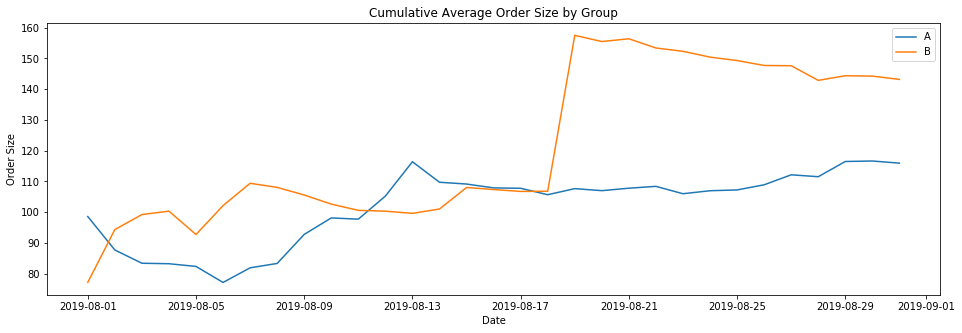

In [10]:
#Create the line graph of the average order size between the two groups
plt.figure(figsize=(16,5))
plt.title('Cumulative Average Order Size by Group')
plt.xlabel('Date')
plt.ylabel('Order Size')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

Group A starts off with more orders at first, then fluctuates a bit but flattens out to a consistent amount towards the end. 

Group B starts off with less orders, but then plateaus off after a bit, then has a sharp increase of orders, and then plateaus off again at the new peak. Again, analysis needs to be done to see what the sudden increase of orders means.

---


<div class="alert alert-block alert-warning">
    

### Reviewer's comment V2
    
Correct graph description! 
    
Could you make an assumption about anomaly?
    
What can you say about data behavior at the second part of the time period?

</div>

---


### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

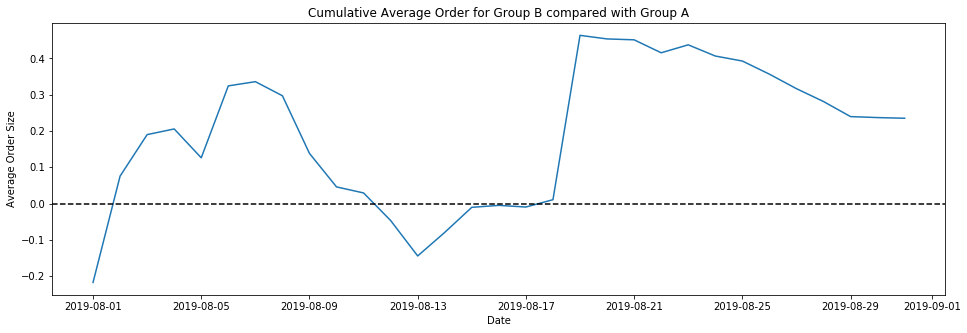

In [11]:
#Merge the two groups together 
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#Create a line graph of the relative differences in order sizes for group B
plt.figure(figsize=(16,5))
plt.title('Cumulative Average Order for Group B compared with Group A')
plt.xlabel('Date')
plt.ylabel('Average Order Size')
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--');

Average order size of Group B compared with Group A shows that it sharply increased in the beginning, then suddenly fell off, but then rose sharply again. The sharp changes in orders might be due to the large increase of orders. 

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. 

### Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

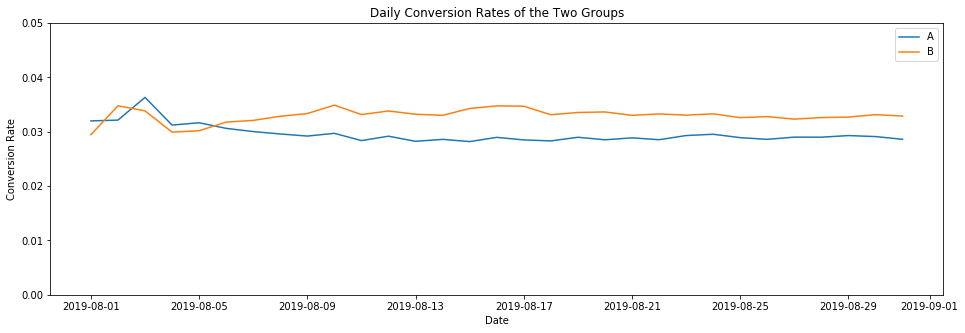

In [12]:
#Create a new column for conversion and then split the data into their groups
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#Plot a line graph to show the conversion rates for the two groups
plt.figure(figsize=(16,5))
plt.title('Daily Conversion Rates of the Two Groups')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([None, None, 0, 0.05])
plt.legend();


At the start, Group A had a better conversion rate than Group B, but Group B caught up quickly and started to hold the lead for conversion rate. 

I decided to set the y axis in order to show that the conversion rates do stabilize and don't fluctuate that much.

---


<div class="alert alert-block alert-success">
    

### Reviewer's comment V2
    
Great! Proper conclusion about rates stabilization!
    
Pay attention to the Y axis name - a little mix-up there  

</div>

---


### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

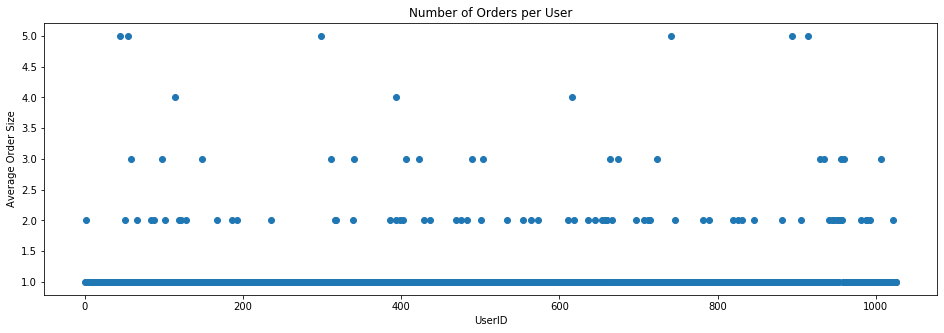

In [13]:
#Drop the columns not needed to focus on the orders per user data
ordersByUsers = filtered_orders.drop(['group', 'revenue', 'date'], axis=1).groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']

#Plot Scatterplot
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(16,5))
plt.title('Number of Orders per User')
plt.xlabel('UserID')
plt.ylabel('Average Order Size')
plt.scatter(x_values, ordersByUsers['orders']);

Many users make 1 or 2 orders, and only a couple make 3 or more orders. It appears that orders are 4 or more are outliers.

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [14]:
#Calculate the 95th and 99th percentile
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 3.]


Examining the 95th and 99th percentiles shows that 5% of the users make 2 orders while only 1% of the users make 3 or more orders. It would seem that any orders that are 3 or more can be considered to be an anomaly.

### Plot a scatter chart of order prices. Make conclusions and conjectures.

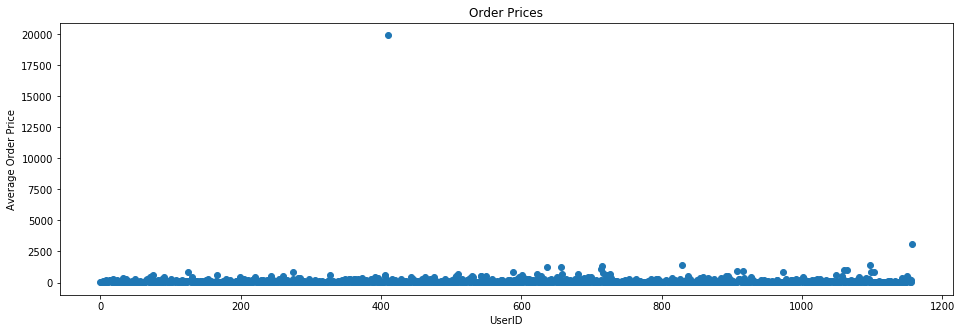

In [15]:
#Plot scatter plot
x_values = pd.Series(range(0,len(filtered_orders['revenue'])))
plt.figure(figsize=(16,5))
plt.title('Order Prices')
plt.xlabel('UserID')
plt.ylabel('Average Order Price')
plt.scatter(x_values, filtered_orders['revenue']);

Examining the scatter plot of the order prices, it seems clear that order prices above 2500 are rare, and the one order price at 20000 to be a clear outlier.

### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.


In [16]:
#Calculate the 95th and 99th percentile
print(np.percentile(filtered_orders['revenue'], [95, 99]))

[425.815 862.765]


Examining the 95th and 99th percentiles shows that 5% of the users make orders that are 425.815 while only 1% of the users make order prices at 862.765. It seems that order prices at 862.765 or more can be considered to be outliers.

---


<div class="alert alert-block alert-success">
    

### Reviewer's comment V2
    
Good work with anomaly!
    
Abnormal users are defined.
    
It's also helpful to use histogram and boxplot for anomaly research
    

</div>

---


### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.


***Null Hypothesis: Group A and Group B have similar conversion rates***

***Alt Hypothesis: Group A and Group B have do not have similar conversion rates***

---


<div class="alert alert-block alert-success">
    

### Reviewer's comment V2
    
Well done! Thank you for hypothesis definition!

</div>

---


In [17]:
#Seperate the data into their respective groups and relabel their columns
ordersByUsersA = filtered_orders[filtered_orders['group']=='A'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = filtered_orders[filtered_orders['group']=='B'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']


#Calculate the conversion rates between the two groups
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(
    visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(
    visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

#Calculate the p-value and relative conversion rate gain for group B
print('The p-value to compare the groups conversion is:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('The relative difference in conversion gain for B is:',"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

print()
#P-value results
alpha = .05

if (stats.mannwhitneyu(sampleA, sampleB)[1] < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

The p-value to compare the groups conversion is: 0.00816
The relative difference in conversion gain for B is: 0.149

Null hypothesis rejected: the difference is statistically significant


By looking at the results here, the p-value is much lower than 0.05 so the null hypothesis is rejected. Also, group b has a conversion gain of 14.9% compared to group a.

### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.


***Null Hypothesis: Group A and Group B have similar average order sizes***

***Alt Hypothesis: Group A and Group B have do not have similar average order sizes***

In [18]:
#Calculate the p-value and relative conversion rate gain for group B
print('The p-value to compare the groups conversion is:',
      "{0:.3f}".format(stats.mannwhitneyu(filtered_orders[filtered_orders['group']=='A']['revenue'],
                                          filtered_orders[filtered_orders['group']=='B']['revenue'])[1]))
print('The relative difference in conversion gain for B is:',
      "{0:.3f}".format(filtered_orders[filtered_orders['group']=='B']['revenue'].mean()/
                       filtered_orders[filtered_orders['group']=='A']['revenue'].mean()-1))

print()
#P-value results
alpha = .05

if (stats.mannwhitneyu(filtered_orders[filtered_orders['group']=='A']['revenue'],
                                          filtered_orders[filtered_orders['group']=='B']['revenue'])[1] < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

The p-value to compare the groups conversion is: 0.480
The relative difference in conversion gain for B is: 0.235

Failed to reject the null hypothesis: we can't make conclusions about the difference


The p-value calculated here is less than 0.05, so there is a statistical difference between the two groups in their average order sizes. The relative difference between group b and group a is 23.5%.

### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.


***Null Hypothesis: Group A and Group B have similar conversion rates using the filtered data***

***Alt Hypothesis: Group A and Group B have do not have similar conversion rates using the filtered data***

---


<div class="alert alert-block alert-success">
    

### Reviewer's comment V2
    
It's cool that you clarify hypothesis phrase with "filtered" term. Very helpful to define all necessary / sufficient info in hypothesis phrase.
</div>

---


In [19]:
#Isolate the outliers
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 3]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] >= 3]['visitorId']], axis = 0)
usersWithExpensiveOrders = filtered_orders[filtered_orders['revenue'] > 800]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()


#Filter the data to remove outliers
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(
    abnormalUsers))]['orders'],pd.Series(0, index=np.arange(
    visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(
    abnormalUsers))]['orders'],pd.Series(0, index=np.arange(
    visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print('The p-value to compare the groups conversion is:',
      "{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('The relative difference in conversion gain for B is:',
      "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

print()
#P-value results
alpha = .05

if (stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

The p-value to compare the groups conversion is: 0.00410
The relative difference in conversion gain for B is: 0.182

Null hypothesis rejected: the difference is statistically significant


After filtering the data and finding the p-value and the relative difference between the groups, it appears that the null hypothesis is rejected still. The relative difference between the groups shows that there is a gain for group b by 18.2%.

### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.


***Null Hypothesis: Group A and Group B have similar average order sizes using the filtered data***

***Alt Hypothesis: Group A and Group B have do not have similar average order sizes using the filtered data***

In [20]:
#Calculate the p-value and relative conversion rate gain for group B with the filtered data
print('The p-value to compare the groups conversion is:',"{0:.3f}".format(stats.mannwhitneyu(
    filtered_orders[np.logical_and(
        filtered_orders['group']=='A',
        np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    filtered_orders[np.logical_and(
        filtered_orders['group']=='B',
        np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('The relative difference in conversion gain for B is:',"{0:.3f}".format(
    filtered_orders[np.logical_and(filtered_orders['group']=='B',np.logical_not(filtered_orders['visitorId'].isin(
        abnormalUsers)))]['revenue'].mean()/filtered_orders[np.logical_and(
        filtered_orders['group']=='A',
        np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

print()
#P-value results
alpha = .05

if (stats.mannwhitneyu(
    filtered_orders[np.logical_and(
        filtered_orders['group']=='A',
        np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    filtered_orders[np.logical_and(
        filtered_orders['group']=='B',
        np.logical_not(filtered_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1] < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

The p-value to compare the groups conversion is: 0.494
The relative difference in conversion gain for B is: 0.018

Failed to reject the null hypothesis: we can't make conclusions about the difference


After removing the anomolies in the data, the p-value is still less than 0.05 so there is a statistical difference between the groups' average order sizes. The relative difference has decreased to only 1.8% gain for group b compared to group a.

---


<div class="alert alert-block alert-success">
    

### Reviewer's comment V2
    
Amazing! Your statistical tests are performed correctly!  

</div>

---


### Make a decision based on the test results. The possible decisions are: 

1. Stop the test, consider one of the groups the leader. 

2. Stop the test, conclude that there is no difference between the groups. 

3. Continue the test.


After examining the conclusions provided by the data, I would choose option 1: Stop the test, consider one of the groups the leader. 

Since there is a statistically difference between the two groups and that group b is the clear leader. From this point, I would suggest to move onto the next hypothesis in order to come up with further conclusions. 

***General Conclusion***

The raw data with the hypotheses result, the order results and visits results needed to be assigned to the correct value types in order to be ready to be analyzed. The orders results also had a couple of odd customers who switched between the two groups too often, so removing them was the best option in order to not affect the results of the test. 

Examining both the ICE and RICE frameworks for the hypotheses seem to show that 'Add a subscription form to all the main pages', 'Add two new channels for attracting traffic', 'Add a subscription form to all the main pages' are all weighted well and should increase revenue. 

After analyzing the data between the two groups, A and B, it is shown that group B has a higher average order size and a higher average conversion rate. Group B had a sudden increase in order size and revenue that is due to a user who placed an irregularly large order. Further visualization of the data still shows that group B to have a clear advantage over group A in order sizes and conversion rates.

***Recommendation***

I would suggest to the customer that the best option would be to adopt the changes done to group B. Group B showed a 18.2% increase in conversion rate and a 1.8% increase in order sizes compared to group A. Furthermore, the hypthoeses 'Add a subscription form to all the main pages' and 'Add a subscription form to all the main pages' have a noticable impact on revenue gain for group B. With those hypotheses in mind, I would recommend the customer to adopt those changes onto the main site. 

---


<div class="alert alert-block alert-danger">
    

### Reviewer's comment V2

As I mentioned above all steps of your research should be reflected at general conclusion chapter: preprocessing, RICE / ICE Prioritizing, cumulative metrics research, etc - not only AB test results 
    
I didn't find at your general conclusion what to do with the AB test further and what is the result - add more business context to the conclusion, highlight "Recommendation section"

</div>

---


---


<div class="alert alert-block alert-success">
    

### Reviewer's comment V3
    
You’ve made excellent progress! Proper conclusion and recommendation

</div>

---




<div class="alert alert-block alert-warning">
    

### General reviewer's comment V2

You did such a good job!
    
You perform correct computations, build good looking plots, write correct conclusions.
    
I've found some tiny mistakes in your project (see my comments above). 
    
    
They'll be easy to fix.
    
</div>

---


---

<div class="alert alert-block alert-success">
    

### General reviewer's comment V3

Your project has passed code review. Congratulations!
    
Keep up the good work.
    
</div>

---
